<a href="https://www.kaggle.com/code/ompandey23/pokedex-data-exploration?scriptVersionId=200068857" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Pokedex data - Exploratory Data Analysis

## Creating this notebook to perform EDA on this task. Let's see, what all activities can be done on such a data set and what information can we get.

### Left as is, the below block. Just ran it once to see what we have in store here. Running the above block prints all files currently in the input directory.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokemon-pokedex-data/pokemon_pokedex_data.csv


### Code block for importing libraries at one place

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

## Just reading the data in using pd.read_csv()
#### Pokedex_ID is not the dataset serial number column. Also, I don't believe we have any actual use of pokedex-id for any work that we might be doing. If anyone can comment on that.

In [3]:
poke = pd.read_csv('/kaggle/input/pokemon-pokedex-data/pokemon_pokedex_data.csv')

### Printed head and tail, just to look at it

In [4]:
poke.head(5)

,pokedex_id,name,type_1,type_2,total_attack,health_points,attack,defense,special_attack,special_defense,speed,generation,is_legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
poke.tail()

,pokedex_id,name,type_1,type_2,total_attack,health_points,attack,defense,special_attack,special_defense,speed,generation,is_legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


### Check out this mamacita, 800 rows, 13 columns. Damn!

### dataframe-info() method gives the datatypes of each column, shows if any null values are present in any column. In my opinion, pokedex_id should not be an integer value. It is an ID, not a number, per say.

In [6]:
poke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pokedex_id       800 non-null    int64 
 1   name             800 non-null    object
 2   type_1           800 non-null    object
 3   type_2           414 non-null    object
 4   total_attack     800 non-null    int64 
 5   health_points    800 non-null    int64 
 6   attack           800 non-null    int64 
 7   defense          800 non-null    int64 
 8   special_attack   800 non-null    int64 
 9   special_defense  800 non-null    int64 
 10  speed            800 non-null    int64 
 11  generation       800 non-null    int64 
 12  is_legendary     800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [7]:
# to get the dimensions of the dataset

poke.shape

(800, 13)

#### We don't need pokedex_id as integer type. Let's change it to string type or object type

In [8]:
# poke -> pokedex_id as_type -> object/str
poke['pokedex_id']=poke['pokedex_id'].astype(object)

In [9]:
poke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pokedex_id       800 non-null    object
 1   name             800 non-null    object
 2   type_1           800 non-null    object
 3   type_2           414 non-null    object
 4   total_attack     800 non-null    int64 
 5   health_points    800 non-null    int64 
 6   attack           800 non-null    int64 
 7   defense          800 non-null    int64 
 8   special_attack   800 non-null    int64 
 9   special_defense  800 non-null    int64 
 10  speed            800 non-null    int64 
 11  generation       800 non-null    int64 
 12  is_legendary     800 non-null    bool  
dtypes: bool(1), int64(8), object(4)
memory usage: 75.9+ KB


In [10]:
# you can get the list of column names

poke.columns

Index(['pokedex_id', 'name', 'type_1', 'type_2', 'total_attack',
       'health_points', 'attack', 'defense', 'special_attack',
       'special_defense', 'speed', 'generation', 'is_legendary'],
      dtype='object')

cleaning

top 5 pokemon of each type (type_1)


### You can see in the output of info(), 1 column has some null values. Let's see them specifically

In [11]:
poke.isna().sum()

pokedex_id           0
name                 0
type_1               0
type_2             386
total_attack         0
health_points        0
attack               0
defense              0
special_attack       0
special_defense      0
speed                0
generation           0
is_legendary         0
dtype: int64

### Some pokemon don't have a secondary type. So, there are some empty cells in the data set in the 'type_2' column.
#### I want to replace the empty values with 'NA'

In [12]:
# this .fillna() fills all null cells with any value you define.

poke['type_2'] = poke['type_2'].fillna('NA')

In [13]:
poke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pokedex_id       800 non-null    object
 1   name             800 non-null    object
 2   type_1           800 non-null    object
 3   type_2           800 non-null    object
 4   total_attack     800 non-null    int64 
 5   health_points    800 non-null    int64 
 6   attack           800 non-null    int64 
 7   defense          800 non-null    int64 
 8   special_attack   800 non-null    int64 
 9   special_defense  800 non-null    int64 
 10  speed            800 non-null    int64 
 11  generation       800 non-null    int64 
 12  is_legendary     800 non-null    bool  
dtypes: bool(1), int64(8), object(4)
memory usage: 75.9+ KB


#### I had changed the column names in this dataset and had some more issues that I wanted to fix using python. The secondary type of pokemons was empty. This was one more issue I had with this data. 
#### Once I'm done with the dataset fixing, I'll export it and upload to Kaggle database and prolly make a new notebook for it.

In [14]:
#poke.to_csv('pokemon_cleaned_data.csv', index=False)

### Now some fun things. we can see what distinct values we have for different pokemon types

In [15]:
# this prints all values for a column 'type_1' from dataframe 'poke'
# poke['type_1'].values

# if we create a set of these values, we get only the distinct (non-repeating) values
set(poke['type_1'].values)

{'Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water'}

In [16]:
# similarily for type_2:
print(set(poke['type_2'].values))

{'Ghost', 'Dragon', 'Flying', 'Bug', 'Normal', 'Ground', 'Rock', 'Steel', 'Fairy', 'Psychic', 'Fighting', 'Ice', 'Water', 'Dark', 'Poison', 'Grass', 'Fire', 'Electric', 'NA'}


In [17]:
# using this technique we can verify how many distict values 'is_legendary' column has. Ideally, it should have just 2 values. Also, cause its datatype was bool.
# True and False

print(set(poke['is_legendary'].values))

{False, True}


In [18]:
''' 
Let's talk about 'total_attack' column. They have added all the values of columns - 
health_points, attack, defense, special_attack, special_defense, and speed and saved it in total_attack column.
'''

# So, should we try and sort the dataframe by column 'total_attack' and let's group it by 'type_1', somehow . . .
poke.sort_values(by='total_attack', ascending=False)

,pokedex_id,name,type_1,type_2,total_attack,health_points,attack,defense,special_attack,special_defense,speed,generation,is_legendary
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
164,150,MewtwoMega Mewtwo Y,Psychic,NA,780,106,150,70,194,120,140,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
422,382,KyogrePrimal Kyogre,Water,NA,770,100,150,90,180,160,90,3,True
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,10,Caterpie,Bug,NA,195,45,30,35,20,20,45,1,False
288,265,Wurmple,Bug,NA,195,45,45,35,20,30,20,3,False
446,401,Kricketot,Bug,NA,194,37,25,41,25,41,25,4,False
322,298,Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,False


In [19]:
sorted_poke = poke.sort_values(by='total_attack', ascending=False)
grouped_poke = sorted_poke.groupby('type_1')

In [20]:
grouped_poke.groups.keys()

dict_keys(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water'])

In [21]:
'''
for type_1, group in grouped_poke:
    print(f"Type 1: {type_1}")
    print(group)
    print()
'''

'\nfor type_1, group in grouped_poke:\n    print(f"Type 1: {type_1}")\n    print(group)\n    print()\n'

In [22]:
poke.groupby('type_1')['attack'].mean()

type_1
Bug          70.971014
Dark         88.387097
Dragon      112.125000
Electric     69.090909
Fairy        61.529412
Fighting     96.777778
Fire         84.769231
Flying       78.750000
Ghost        73.781250
Grass        73.214286
Ground       95.750000
Ice          72.750000
Normal       73.469388
Poison       74.678571
Psychic      71.456140
Rock         92.863636
Steel        92.703704
Water        74.151786
Name: attack, dtype: float64

In [23]:
poke.groupby('type_1')['defense'].mean()

type_1
Bug          70.724638
Dark         70.225806
Dragon       86.375000
Electric     66.295455
Fairy        65.705882
Fighting     65.925926
Fire         67.769231
Flying       66.250000
Ghost        81.187500
Grass        70.800000
Ground       84.843750
Ice          71.416667
Normal       59.846939
Poison       68.821429
Psychic      67.684211
Rock        100.795455
Steel       126.370370
Water        72.946429
Name: defense, dtype: float64

### plotting idea. we can plot mean of attack and defense, hue as different pokemon types

#### x axis will be 'type_1' (group IDs) 

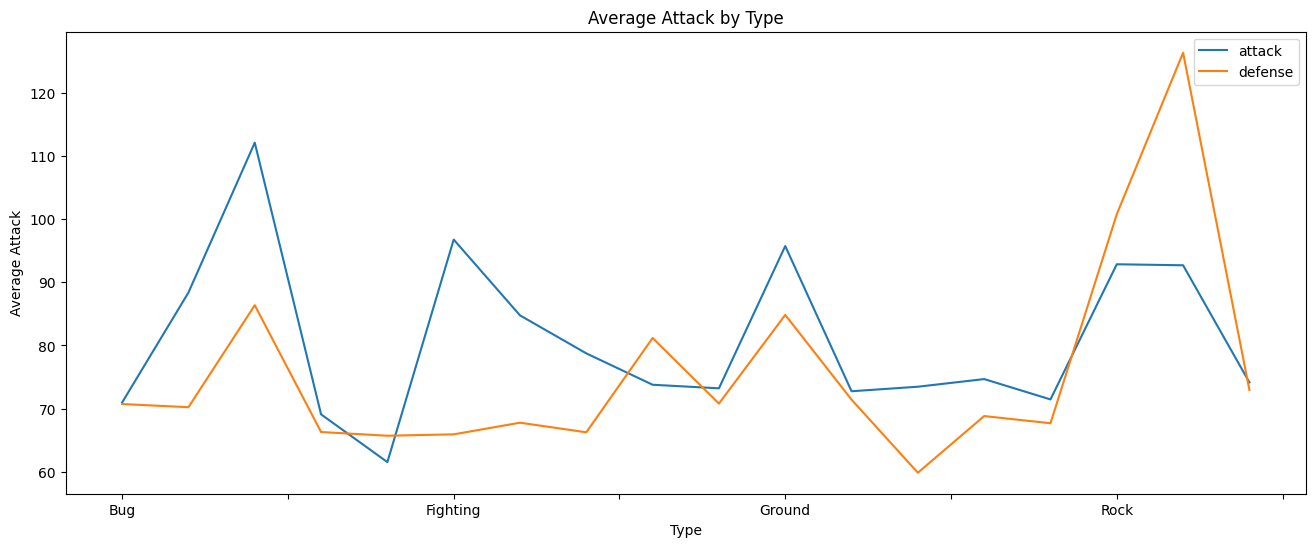

In [24]:
# Calculate the average attack by type
average_attack_by_type = poke.groupby('type_1')['attack'].mean()
average_defense_by_type = poke.groupby('type_1')['defense'].mean()

# Plot the results
plt.figure(figsize=(16, 6))
average_attack_by_type.plot(kind='line')
average_defense_by_type.plot(kind='line')
plt.title('Average Attack by Type')
plt.xlabel('Type')
plt.ylabel('Average Attack')
plt.xticks()
plt.legend()
plt.show()

#### Not able to display all the xticks

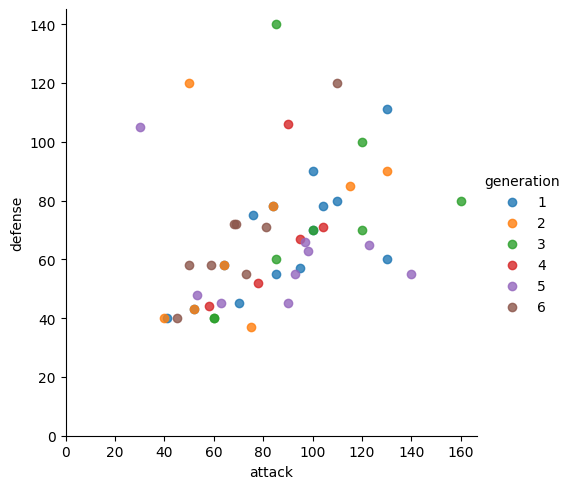

In [25]:
sns.lmplot(x='attack', y='defense', data=poke[poke['type_1'] == 'Fire'],
           fit_reg=False, hue='generation')
plt.ylim(0,None)
plt.xlim(0,None)
plt.show()

In [26]:
poke.describe()

,total_attack,health_points,attack,defense,special_attack,special_defense,speed,generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000
